# Import packages

In [222]:
import math
import cv2
import os
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

from tensorflow import Tensor
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Convolution2D, MaxPooling2D, Flatten, Dense, Dropout

%matplotlib inline

# Load dataset

In [ ]:
from keras.datasets import cifar10

(x_train, y_train), (x_test, y_test) = cifar10.load_data()

x_train = x_train.reshape(-1, 32, 32, 3)
y_train = tf.keras.utils.to_categorical(y_train, 10)

x_test = x_test.reshape(-1, 32, 32, 3)
y_test = tf.keras.utils.to_categorical(y_test, 10)

print(f"shape of train image: {x_train.shape}")
print(f"shape of train label: {y_train.shape}")
print(f"shape of test image: {x_test.shape}")
print(f"shape of train label: {y_test.shape}")

shape of train image: (50000, 32, 32, 3)
shape of train label: (50000, 10)
shape of test image: (10000, 32, 32, 3)
shape of train label: (10000, 10)


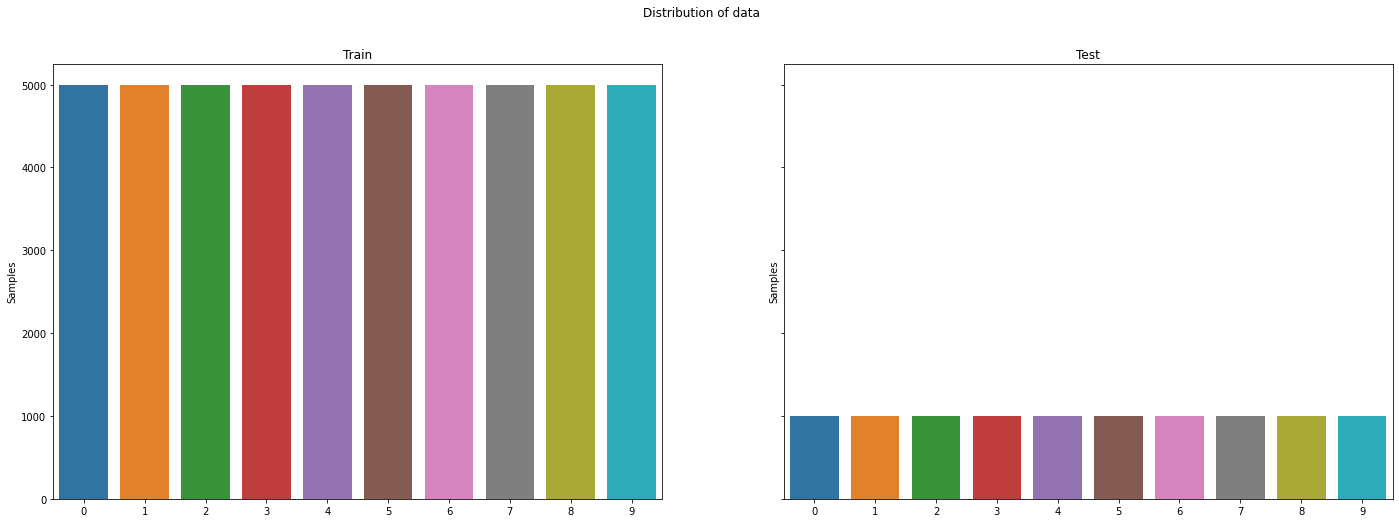

In [ ]:
fig, ax = plt.subplots(1, 2, sharey=True, figsize=(24, 8))
fig.suptitle('Distribution of data')

sns.countplot(ax=ax[0], x=np.argmax(y_train, axis=1)) 
ax[0].set_title('Train')
ax[0].set_ylabel('Samples')

sns.countplot(ax=ax[1], x=np.argmax(y_test, axis=1)) 
ax[1].set_title('Test')
ax[1].set_ylabel('Samples')

plt.show()

# early_stopping

In [ ]:
early_stopping = tf.keras.callbacks.EarlyStopping(
    min_delta=0.001, # minimium amount of change to count as an improvement
    patience=30, # how many epochs to wait before stopping
    restore_best_weights=True,
)

# AlexNet

In [ ]:
def get_AlexNet(input_shape, output_shape):
  inputs = tf.keras.Input(shape=input_shape, name='input_layer')

  x = tf.keras.layers.Conv2D(96/8, (math.ceil(11/3), math.ceil(11/3)), strides=(math.ceil(4/2), math.ceil(4/2)), activation='relu', name="conv_layer_1")(inputs)
  x = tf.keras.layers.MaxPooling2D(pool_size=(3, 3), strides=(2, 2), name="pooling_layer_1")(x)

  x = tf.keras.layers.Conv2D(256/8, (5, 5), strides=(1, 1), padding='same', activation='relu', name="conv_layer_2")(x)
  x = tf.keras.layers.MaxPooling2D(pool_size=(3, 3), strides=(2, 2), name="pooling_layer_2")(x)

  x = tf.keras.layers.Conv2D(384/8, (3, 3), strides=(1, 1), padding='same', activation='relu', name="conv_layer_3")(x)
  x = tf.keras.layers.Conv2D(384/8, (3, 3), strides=(1, 1), padding='same', activation='relu', name="conv_layer_4")(x)
  x = tf.keras.layers.Conv2D(256/8, (3, 3), strides=(1, 1), padding='same', activation='relu', name="conv_layer_5")(x)
  x = tf.keras.layers.MaxPooling2D(pool_size=(3, 3), strides=(2, 2), name="pooling_layer_3")(x)

  x = tf.keras.layers.Flatten()(x)
  x = tf.keras.layers.Dense(4096/32, activation="relu", name='Dense_layer_1')(x)
  x = tf.keras.layers.Dropout(0.5)(x)
  x = tf.keras.layers.Dense(4096/32, activation="relu", name='Dense_layer_2')(x)
  x = tf.keras.layers.Dropout(0.5)(x)
  outputs = tf.keras.layers.Dense(output_shape, activation="relu", name='softmax')(x)

  model = tf.keras.Model(inputs=inputs, outputs=outputs, name="functional_api")
  return model

In [ ]:
AlexNet = get_AlexNet((32,32,3), 10)
AlexNet.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss=tf.keras.losses.MSE, metrics=['accuracy'])
AlexNet.summary()

Model: "functional_api"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 32, 32, 3)]       0         
                                                                 
 conv_layer_1 (Conv2D)       (None, 15, 15, 12)        588       
                                                                 
 pooling_layer_1 (MaxPooling  (None, 7, 7, 12)         0         
 2D)                                                             
                                                                 
 conv_layer_2 (Conv2D)       (None, 7, 7, 32)          9632      
                                                                 
 pooling_layer_2 (MaxPooling  (None, 3, 3, 32)         0         
 2D)                                                             
                                                                 
 conv_layer_3 (Conv2D)       (None, 3, 3, 48)       

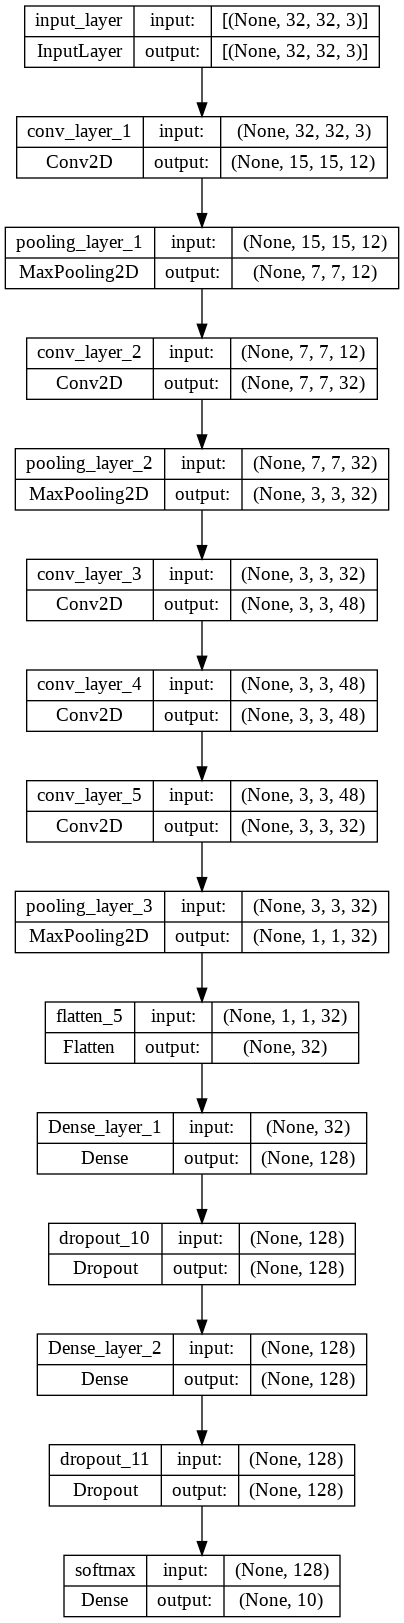

In [180]:
tf.keras.utils.plot_model(AlexNet, to_file="my_model.png", show_shapes=True)

In [ ]:
history = AlexNet.fit(
    x_train, y_train,
    validation_data=(x_test, y_test),
    batch_size=128,
    epochs=100,
    callbacks=[early_stopping], # put your callbacks in a list
)

Epoch 1/100
391/391 [==============================] - 3s 6ms/step - loss: 0.3030 - accuracy: 0.1133 - val_loss: 0.0934 - val_accuracy: 0.1873
Epoch 2/100
391/391 [==============================] - 2s 5ms/step - loss: 0.0893 - accuracy: 0.1990 - val_loss: 0.0822 - val_accuracy: 0.2602
Epoch 3/100
391/391 [==============================] - 2s 5ms/step - loss: 0.0832 - accuracy: 0.2707 - val_loss: 0.0782 - val_accuracy: 0.3368
Epoch 4/100
391/391 [==============================] - 2s 5ms/step - loss: 0.0801 - accuracy: 0.3175 - val_loss: 0.0765 - val_accuracy: 0.3581
Epoch 5/100
391/391 [==============================] - 2s 5ms/step - loss: 0.0780 - accuracy: 0.3496 - val_loss: 0.0736 - val_accuracy: 0.4011
Epoch 6/100
391/391 [==============================] - 2s 5ms/step - loss: 0.0759 - accuracy: 0.3818 - val_loss: 0.0718 - val_accuracy: 0.4257
Epoch 7/100
391/391 [==============================] - 2s 5ms/step - loss: 0.0738 - accuracy: 0.4114 - val_loss: 0.0702 - val_accuracy: 0.4493

In [164]:
AlexNet.save("cifar10_AlexNet.h5")

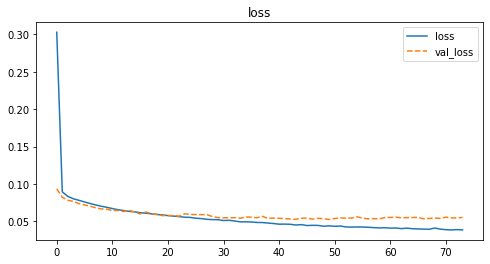

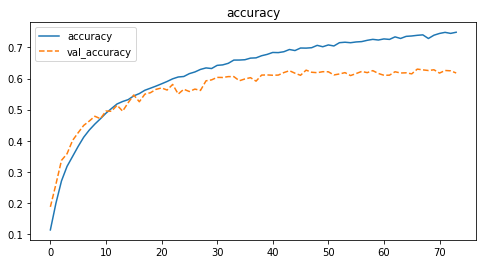

In [ ]:
# Loss
fig, ax = plt.subplots(figsize=(8,4))
plt.title('loss')
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss', linestyle='--')
plt.legend()
plt.show()

# Accuracy
fig, ax = plt.subplots(figsize=(8,4))
plt.title('accuracy')
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy', linestyle='--')
plt.legend()
plt.show()

# VGG

In [ ]:
def get_VGG(input_shape, output_shape):
  c = 8
  inputs = tf.keras.Input(shape=input_shape, name='input_layer')

  x = tf.keras.layers.Conv2D(64/c, (3, 3), padding='same', activation='relu', name="conv_layer_1")(inputs)
  x = tf.keras.layers.Conv2D(64/c, (3, 3), padding='same', activation='relu', name="conv_layer_2")(x)
  x = tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2), name="pooling_layer_1")(x)

  x = tf.keras.layers.Conv2D(128/c, (3, 3), padding='same', activation='relu', name="conv_layer_3")(x)
  x = tf.keras.layers.Conv2D(128/c, (3, 3), padding='same', activation='relu', name="conv_layer_4")(x)
  x = tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2), name="pooling_layer_2")(x)

  x = tf.keras.layers.Conv2D(256/c, (3, 3), padding='same', activation='relu', name="conv_layer_5")(x)
  x = tf.keras.layers.Conv2D(256/c, (3, 3), padding='same', activation='relu', name="conv_layer_6")(x)
  x = tf.keras.layers.Conv2D(256/c, (3, 3), padding='same', activation='relu', name="conv_layer_7")(x)
  x = tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2), name="pooling_layer_3")(x)  

  x = tf.keras.layers.Conv2D(512/c, (3, 3), padding='same', activation='relu', name="conv_layer_8")(x)
  x = tf.keras.layers.Conv2D(512/c, (3, 3), padding='same', activation='relu', name="conv_layer_9")(x)
  x = tf.keras.layers.Conv2D(512/c, (3, 3), padding='same', activation='relu', name="conv_layer_10")(x)
  x = tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2), name="pooling_layer_4")(x)

  x = tf.keras.layers.Conv2D(512/c, (3, 3), padding='same', activation='relu', name="conv_layer_11")(x)
  x = tf.keras.layers.Conv2D(512/c, (3, 3), padding='same', activation='relu', name="conv_layer_12")(x)
  x = tf.keras.layers.Conv2D(512/c, (3, 3), padding='same', activation='relu', name="conv_layer_13")(x)
  x = tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2), name="pooling_layer_5")(x)  

  x = tf.keras.layers.Flatten()(x)
  x = tf.keras.layers.Dense(4096/c, activation="relu", name='Dense_layer_1')(x)
  x = tf.keras.layers.Dense(4096/c, activation="relu", name='Dense_layer_2')(x)
  outputs = tf.keras.layers.Dense(output_shape, activation="relu", name='softmax')(x)

  model = tf.keras.Model(inputs=inputs, outputs=outputs, name="functional_api")
  return model

In [ ]:
VGG = get_VGG((32,32,3), 10)
VGG.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss=tf.keras.losses.MSE, metrics=['accuracy'])
VGG.summary()

Model: "functional_api"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 32, 32, 3)]       0         
                                                                 
 conv_layer_1 (Conv2D)       (None, 32, 32, 8)         224       
                                                                 
 conv_layer_2 (Conv2D)       (None, 32, 32, 8)         584       
                                                                 
 pooling_layer_1 (MaxPooling  (None, 16, 16, 8)        0         
 2D)                                                             
                                                                 
 conv_layer_3 (Conv2D)       (None, 16, 16, 16)        1168      
                                                                 
 conv_layer_4 (Conv2D)       (None, 16, 16, 16)        2320      
                                                    

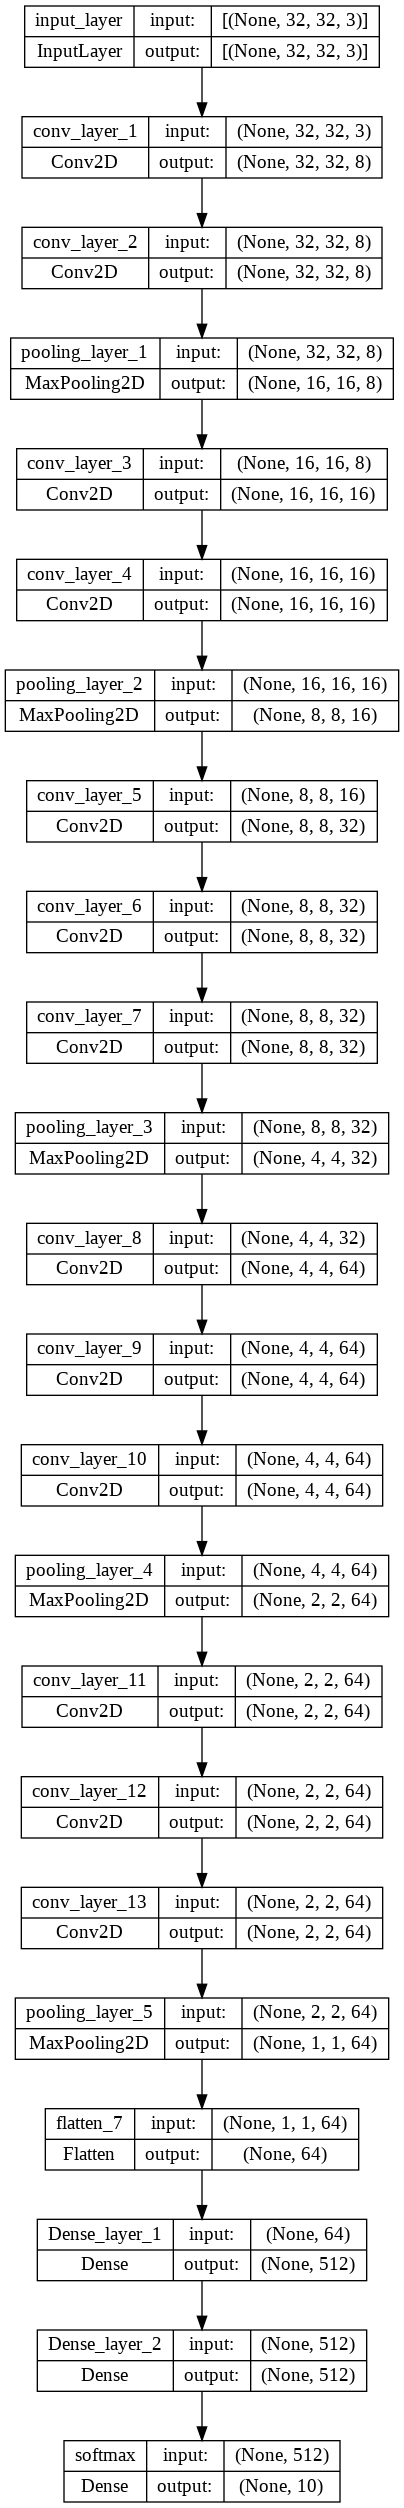

In [181]:
tf.keras.utils.plot_model(VGG, to_file="my_model.png", show_shapes=True)

In [ ]:
history = VGG.fit(
    x_train, y_train,
    validation_data=(x_test, y_test),
    batch_size=128,
    epochs=100,
    callbacks=[early_stopping], # put your callbacks in a list
)

Epoch 1/100
391/391 [==============================] - 5s 11ms/step - loss: 0.0881 - accuracy: 0.2284 - val_loss: 0.0786 - val_accuracy: 0.3520
Epoch 2/100
391/391 [==============================] - 4s 9ms/step - loss: 0.0754 - accuracy: 0.3903 - val_loss: 0.0733 - val_accuracy: 0.4205
Epoch 3/100
391/391 [==============================] - 4s 9ms/step - loss: 0.0697 - accuracy: 0.4483 - val_loss: 0.0682 - val_accuracy: 0.4642
Epoch 4/100
391/391 [==============================] - 4s 9ms/step - loss: 0.0658 - accuracy: 0.4835 - val_loss: 0.0660 - val_accuracy: 0.4831
Epoch 5/100
391/391 [==============================] - 4s 9ms/step - loss: 0.0625 - accuracy: 0.5099 - val_loss: 0.0636 - val_accuracy: 0.5054
Epoch 6/100
391/391 [==============================] - 4s 9ms/step - loss: 0.0561 - accuracy: 0.5706 - val_loss: 0.0564 - val_accuracy: 0.5734
Epoch 7/100
391/391 [==============================] - 4s 9ms/step - loss: 0.0521 - accuracy: 0.6049 - val_loss: 0.0544 - val_accuracy: 0.586

In [163]:
VGG.save("cifar10_VGG.h5")

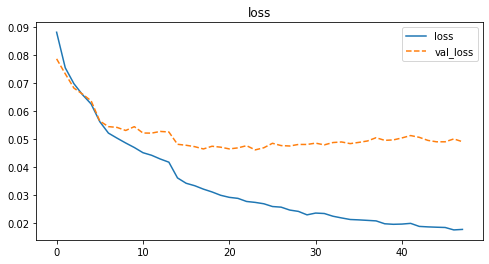

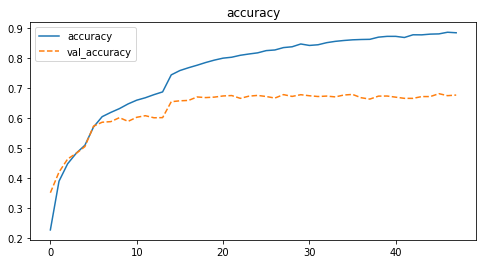

In [ ]:
# Loss
fig, ax = plt.subplots(figsize=(8,4))
plt.title('loss')
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss', linestyle='--')
plt.legend()
plt.show()

# Accuracy
fig, ax = plt.subplots(figsize=(8,4))
plt.title('accuracy')
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy', linestyle='--')
plt.legend()
plt.show()

# ResNet

In [171]:
from tensorflow import Tensor
from tensorflow.keras.layers import ReLU, BatchNormalization, Add

def relu_bn(inputs: Tensor) -> Tensor:
    relu = ReLU()(inputs)
    bn = BatchNormalization()(relu)
    return bn

def residual_block(x: Tensor, downsample: bool, filters: int, kernel_size: int = 3) -> Tensor:
    y = tf.keras.layers.Conv2D(kernel_size=kernel_size, strides= (1 if not downsample else 2), filters=filters, padding="same")(x)
    y = relu_bn(y)
    y = tf.keras.layers.Conv2D(kernel_size=kernel_size, strides=1, filters=filters, padding="same")(y)

    if downsample:
        x = tf.keras.layers.Conv2D(kernel_size=1, strides=2, filters=filters, padding="same")(x)
    out = Add()([x, y])
    out = relu_bn(out)
    return out


def get_ResNet(input_shape, output_shape):
    
    inputs = tf.keras.Input(shape=input_shape, name='input_layer')
    num_filters = 32

    x = BatchNormalization()(inputs)
    x = tf.keras.layers.Conv2D(num_filters, kernel_size=3, strides=1, padding="same")(x)
    x = relu_bn(x)
    
    num_blocks_list = [2, 5, 2]
    for i in range(len(num_blocks_list)):
      num_blocks = num_blocks_list[i]
      for j in range(num_blocks):
        x = residual_block(x, downsample=(j==0 and i!=0), filters=num_filters)
      num_filters *= 2
    
    x = tf.keras.layers.AveragePooling2D(4)(x)
    x = tf.keras.layers.Flatten()(x)
    x = tf.keras.layers.Dense(64, activation="relu")(x)
    outputs = tf.keras.layers.Dense(output_shape, activation='softmax')(x)
    
    model = tf.keras.Model(inputs=inputs, outputs=outputs, name="functional_api")

    return model

In [172]:
ResNet = get_ResNet((32,32,3), 10)
ResNet.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss=tf.keras.losses.MSE, metrics=['accuracy'])
ResNet.summary()

Model: "functional_api"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_layer (InputLayer)       [(None, 32, 32, 3)]  0           []                               
                                                                                                  
 batch_normalization_283 (Batch  (None, 32, 32, 3)   12          ['input_layer[0][0]']            
 Normalization)                                                                                   
                                                                                                  
 conv2d_298 (Conv2D)            (None, 32, 32, 32)   896         ['batch_normalization_283[0][0]']
                                                                                                  
 re_lu_269 (ReLU)               (None, 32, 32, 32)   0           ['conv2d_298[0][0]']

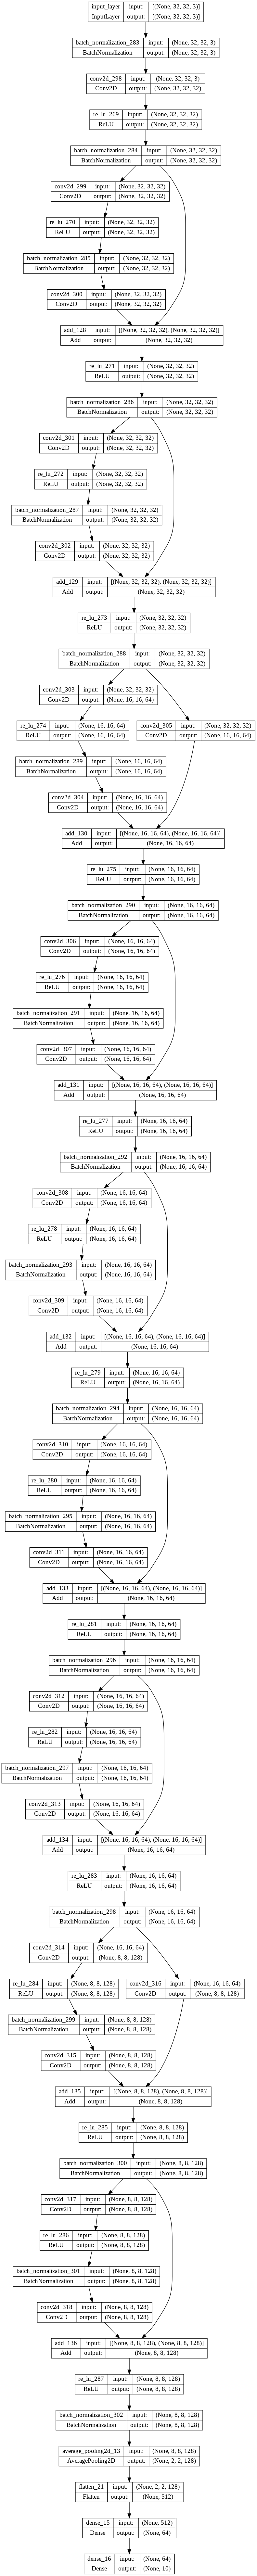

In [173]:
tf.keras.utils.plot_model(ResNet, to_file="my_model.png", show_shapes=True)

In [174]:
history = ResNet.fit(
    x_train, y_train,
    validation_data=(x_test, y_test),
    batch_size=128,
    epochs=100,
    callbacks=[early_stopping], # put your callbacks in a list
)

Epoch 1/100
391/391 [==============================] - 27s 62ms/step - loss: 0.0611 - accuracy: 0.5166 - val_loss: 0.0616 - val_accuracy: 0.5420
Epoch 2/100
391/391 [==============================] - 22s 56ms/step - loss: 0.0414 - accuracy: 0.6930 - val_loss: 0.0486 - val_accuracy: 0.6480
Epoch 3/100
391/391 [==============================] - 22s 56ms/step - loss: 0.0334 - accuracy: 0.7592 - val_loss: 0.0361 - val_accuracy: 0.7433
Epoch 4/100
391/391 [==============================] - 22s 55ms/step - loss: 0.0280 - accuracy: 0.8004 - val_loss: 0.0361 - val_accuracy: 0.7444
Epoch 5/100
391/391 [==============================] - 22s 56ms/step - loss: 0.0242 - accuracy: 0.8302 - val_loss: 0.0307 - val_accuracy: 0.7838
Epoch 6/100
391/391 [==============================] - 22s 56ms/step - loss: 0.0206 - accuracy: 0.8571 - val_loss: 0.0305 - val_accuracy: 0.7855
Epoch 7/100
391/391 [==============================] - 22s 55ms/step - loss: 0.0182 - accuracy: 0.8750 - val_loss: 0.0301 - val_ac

In [175]:
ResNet.save("cifar10_ResNet_f=32.h5")

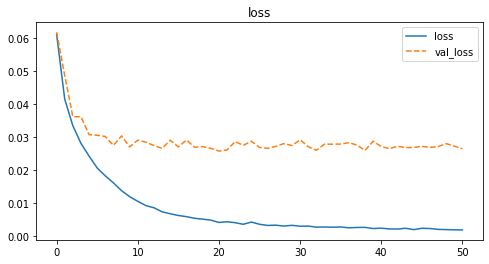

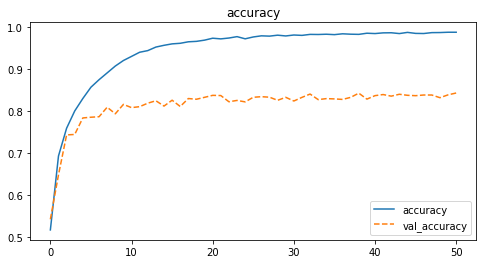

In [176]:
# Loss
fig, ax = plt.subplots(figsize=(8,4))
plt.title('loss')
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss', linestyle='--')
plt.legend()
plt.show()

# Accuracy
fig, ax = plt.subplots(figsize=(8,4))
plt.title('accuracy')
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy', linestyle='--')
plt.legend()
plt.show()

# kaggle predict

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
%cd drive/MyDrive/Colab Notebooks

Mounted at /content/drive
/content/drive/MyDrive/Colab Notebooks


In [ ]:
path = '/content/drive/MyDrive/Colab Notebooks/Cifar-10 /test_data'

kaggle_x = []
kaggle_id = []
for i in range(1,201,1):
  kaggle_id.append(str(i)+'.jpg')
  img = cv2.imread(path+'/'+str(i)+'.jpg')
  kaggle_x.append(img)
kaggle_x = np.array(kaggle_x) 
print(kaggle_x.shape)

In [177]:
model = tf.keras.models.load_model("cifar10_ResNet_f=32.h5")

In [178]:
predict = model.predict(kaggle_x)
predict = np.argmax(predict, axis=1)
print(predict)

7/7 [==============================] - 1s 28ms/step
[0 0 9 3 2 3 1 2 9 4 2 0 5 0 1 6 3 9 1 1 2 5 0 0 2 3 0 2 9 3 2 0 0 7 1 0 4
 6 8 0 8 2 8 7 1 4 2 3 2 6 0 2 5 0 4 5 2 8 2 1 8 9 3 9 0 4 5 0 8 5 3 7 8 1
 8 2 6 2 9 9 9 2 0 9 4 0 5 8 1 6 3 4 0 2 4 7 7 8 0 7 8 0 0 6 4 1 4 0 0 0 9
 4 2 9 5 0 9 6 0 0 4 2 2 3 7 2 7 0 3 0 0 1 0 0 0 0 2 5 5 5 2 6 0 1 0 0 8 9
 5 2 1 6 0 1 1 2 8 1 0 3 4 7 6 5 2 5 0 8 1 2 8 4 6 6 0 4 5 0 2 1 4 6 1 2 0
 2 0 1 0 1 5 6 2 2 4 9 6 0 4 0]


In [179]:
test_label = pd.DataFrame()
test_label["image_id"] = kaggle_id
test_label["class"] = predict
test_label.to_csv('NN_HW5_ResNet_2.csv', index=False)

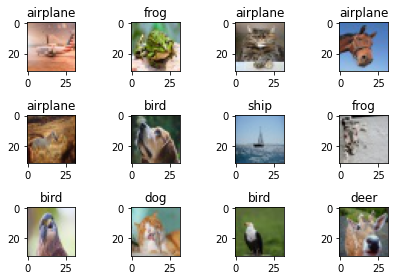

In [220]:
import random
import matplotlib.image as img

trans_ans = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck',]
random = random.sample(range(0,200,1),12)

for i in range(0,12,1):
  plt.subplot(3,4,i+1)
  plt.title(trans_ans[predict[random[i]]])
  image = img.imread(path+'/'+str(random[i]+1)+'.jpg')
  plt.imshow(image,alpha=2)
plt.tight_layout()
plt.show()